In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yamlfile/data.yaml
/kaggle/input/finaldata/Finaldata/data.yaml
/kaggle/input/finaldata/Finaldata/valid/labels/cats_294_jpg.rf.21aacdbabb8086dcfbf367333f113533.txt
/kaggle/input/finaldata/Finaldata/valid/labels/cats19_jpg.rf.1b108d045bc66b989642d8608c0dbed8.txt
/kaggle/input/finaldata/Finaldata/valid/labels/gaur-285_jpg.rf.f29104d8fb23788a69597d9851c9ef33.txt
/kaggle/input/finaldata/Finaldata/valid/labels/LakeStevens_Fatal_jpg.rf.86c83139569f45bb6304925ff055dd42.txt
/kaggle/input/finaldata/Finaldata/valid/labels/cats_283_jpg.rf.558b179798020b8c4650c8e35b29f944.txt
/kaggle/input/finaldata/Finaldata/valid/labels/HolsteinFriesiancattle112_jpg.rf.79264061031cf6e47037ae71647cb280.txt
/kaggle/input/finaldata/Finaldata/valid/labels/img-388_jpg.rf.c2e26a471c031b74f3d4e94328af07de.txt
/kaggle/input/finaldata/Finaldata/valid/labels/Severity_Detect_V24_jpg.rf.1b6b0f0276a692fbe796c60ab02cf190.txt
/kaggle/input/finaldata/Finaldata/valid/labels/dog_cat_110_jpg.rf.4b693520b0980949488bd92

In [3]:
%pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/24/93/12263b1707566bbe8f5c3fe3e4188e19315c67c5b3bcf1f1091d5d0cfd6b/ultralytics-8.0.215-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 21.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5173.4/8062.4 GB disk)


In [5]:
!yolo detect train data=/kaggle/input/yamlfile/data.yaml model=yolov8n.pt epochs=10 imgsz=640

100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 106MB/s]
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/yamlfile/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_n

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/finaldata/Finaldata/valid/labels... 871 images, 0 backgrounds, 0 corrupt: 100%|██████████| 871/871 [00:01<00:00, 781.06it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/finaldata/Finaldata/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:07<00:00,  7.11it/s]


                   all        871       1231      0.779       0.73      0.805      0.472
              Elephant        871        149      0.785      0.926      0.921      0.604
                   Cow        871        125      0.815      0.848      0.929      0.647
                   Dog        871        158      0.737      0.633      0.728      0.429
                Person        871        149      0.766      0.769      0.752      0.404
               Bufflow        871        120      0.759      0.577      0.696      0.428
              Accident        871        124      0.789      0.785      0.847      0.482
                   Cat        871        205       0.75      0.644      0.748      0.409
               Pothole        871        201      0.831       0.66      0.817      0.375


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


array([    0.60371,      0.6469,     0.42887,     0.40395,     0.42805,     0.48155,      0.4087,     0.37481])

In [7]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source="/kaggle/input/finaldata/Finaldata/test"

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/43 /kaggle/input/finaldata/Finaldata/test/1.jpeg: 448x640 1 Elephant, 54.4ms
image 2/43 /kaggle/input/finaldata/Finaldata/test/10.jpeg: 448x640 3 Cows, 5.9ms
image 3/43 /kaggle/input/finaldata/Finaldata/test/11.jpeg: 640x608 1 Cow, 1 Dog, 54.4ms
image 4/43 /kaggle/input/finaldata/Finaldata/test/12.jpeg: 640x640 1 Dog, 7.5ms
image 5/43 /kaggle/input/finaldata/Finaldata/test/13.jpeg: 448x640 1 Cow, 1 Bufflow, 6.4ms
image 6/43 /kaggle/input/finaldata/Finaldata/test/14.jpeg: 384x640 1 Cow, 52.8ms
image 7/43 /kaggle/input/finaldata/Finaldata/test/15.jpeg: 480x640 2 Cows, 2 Dogs, 52.5ms
image 8/43 /kaggle/input/finaldata/Finaldata/test/16.jpeg: 448x640 5 Persons, 6.1ms
image 9/43 /kaggle/input/finaldata/Finaldata/test/17.jpeg: 640x448 1 Person, 53.0ms
image 10/43 /kaggle/input/finaldata/Finaldata/test/18.jpeg: 51

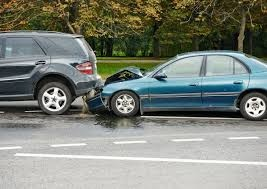

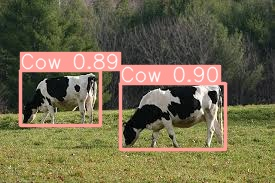

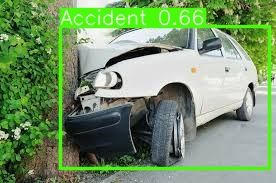

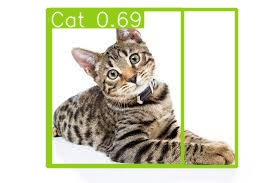

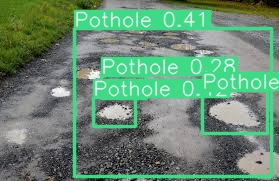

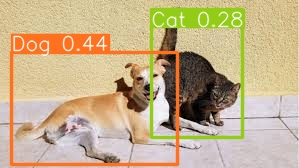

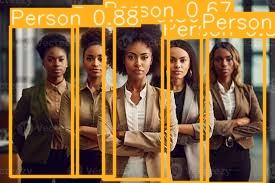

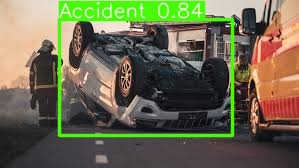

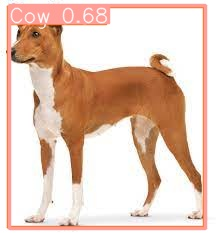

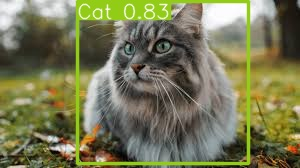

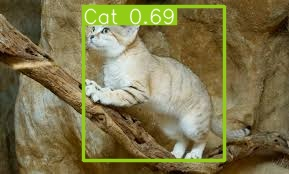

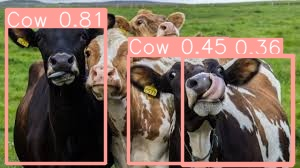

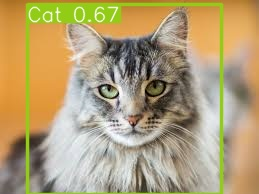

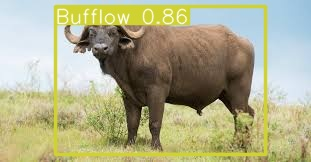

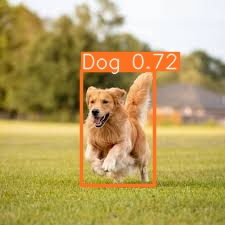

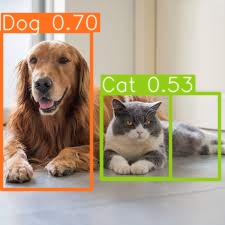

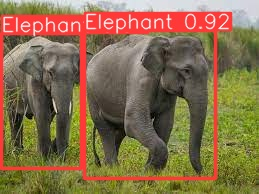

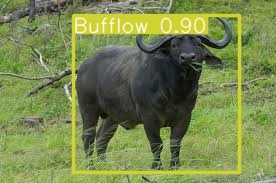

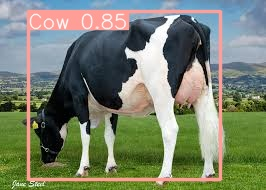

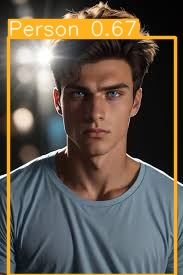

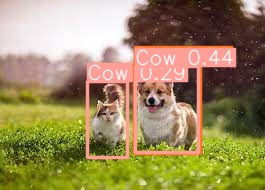

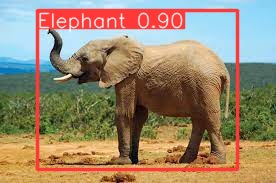

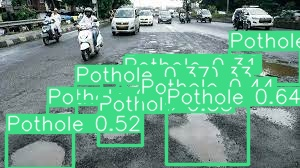

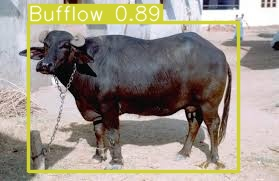

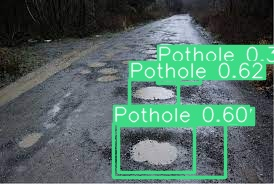

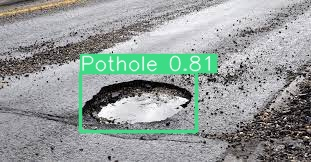

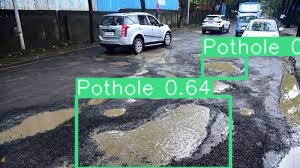

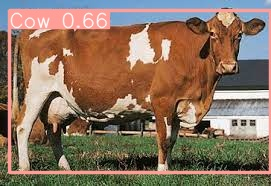

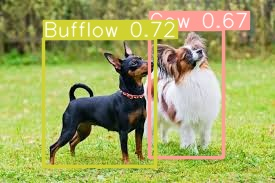

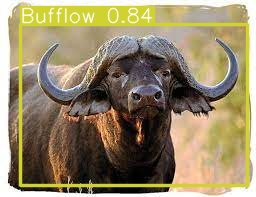

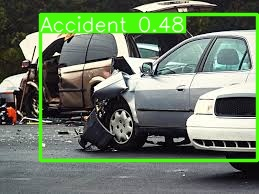

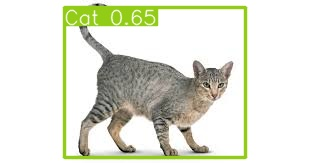

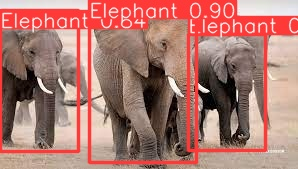

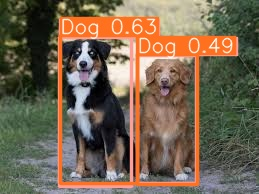

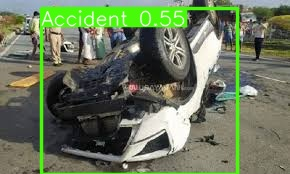

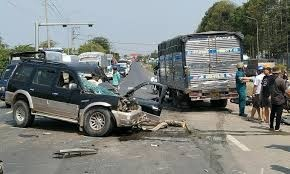

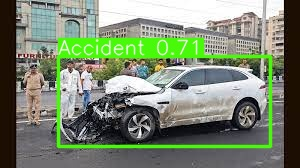

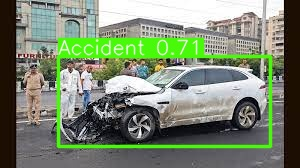

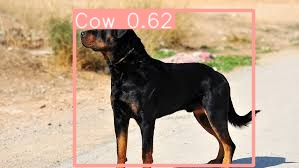

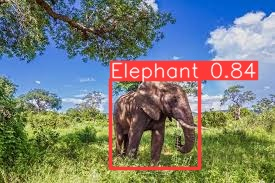

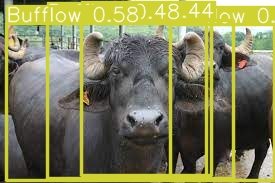

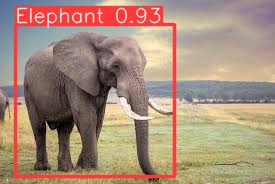

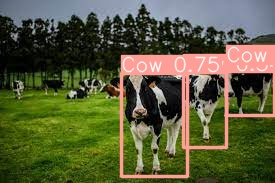

In [11]:



import glob
from IPython.display import Image, display

for imageName in glob.glob('/kaggle/working/runs/detect/predict/*.jpeg'):
    display(Image(filename=imageName))
    print("\n")



In [12]:
!zip -r yolov8n10.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/val/R_curve.png (deflated 6%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/val/F1_curve.png (deflated 6%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 19%)
  adding: kaggle/working/runs/detect/val/P_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/val/PR_curve.png (deflated 9%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 22%)
  adding: kaggle/working/runs/detect/val/val_batch2_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/

In [13]:
from IPython.display import FileLink
FileLink(r'yolov8n10.zip')

/kaggle/working/yolov8n10.zip